# **Results**

This notebook presents the results of the designed framework for the automatic evaluation of the generated content.

Firstly, we plot the length distribution to investigate if there is any underlying pattern in the way the models generate questions and answer according to the emplloyed prompting technique. Additionally, we complared them with the corresponding distribution of ground-truth questionnaires.

Then, the reached scores and insights are shown for the following metrics:
- Conversion Error and Not-JSON error
- Intraquestionnaire similarity
- Question Type variability
- Semantic similarity
- Serendipity

In [1]:
import json
import os
import sys
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1])+'\\src')

from src.visualization.PairResultVisualizer import PairResultVisualizer
from src.visualization.ModelResultVisualizer import ModelResultVisualizer
from src.visualization.GlobalResultVisualizer import GlobalResultVisualizer

In [2]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

In [3]:
gpt_rv = ModelResultVisualizer(project_root=PROJECT_ROOT, model="GPT")
llama_rv = ModelResultVisualizer(project_root=PROJECT_ROOT, model="LLaMa")
mistral_rv = ModelResultVisualizer(project_root=PROJECT_ROOT, model="Mistral")

global_rv = GlobalResultVisualizer(project_root=PROJECT_ROOT)

In [4]:
gpt_bw_conv, gpt_bw_json, gpt_bw_iqs, gpt_bw_semsim, gpt_bw_srdp, gpt_bw_qtv = gpt_rv.get_best_and_worst_experiments()
llama_bw_conv, llama_bw_json, llama_bw_iqs, llama_bw_semsim, llama_bw_srdp, llama_bw_qtv = llama_rv.get_best_and_worst_experiments()
mistral_bw_conv, mistral_bw_json, mistral_bw_iqs, mistral_bw_semsim, mistral_bw_srdp, mistral_bw_qtv = mistral_rv.get_best_and_worst_experiments()

## **Length distributions**

In [5]:
config_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "src", "visualization", "GPT_experiment_pairs.json")
with open(config_path, "r") as f:
    experiment_confs = json.load(f)
f.close()

pairs = experiment_confs["pairs"]

In [6]:
gpt_4_preds = PairResultVisualizer(pairs[0], project_root=PROJECT_ROOT)
pairs.remove(pairs[0])

pairs_to_remove = []

for pair in pairs:
    if pair["id"].__contains__("GPT-4"):
        gpt_4_preds.add_pair(pair)
        gpt_4_preds.load_data(project_root=PROJECT_ROOT)
        
        pairs_to_remove.append(pair)

for pair in pairs_to_remove:
    pairs.remove(pair)


In [7]:
gpt_35_preds = PairResultVisualizer(pairs[0], project_root=PROJECT_ROOT)
pairs.remove(pairs[0])

for pair in pairs:
    gpt_35_preds.add_pair(pair)
    gpt_35_preds.load_data(project_root=PROJECT_ROOT)

### **Questions**

In [8]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_questions, gpt_35_preds.zero_shot_full_questions, gpt_35_preds.one_shot_full_questions, "NAME", "GPT-3.5-Turbo [Task 1]", "Question")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_questions, gpt_35_preds.zero_shot_questions, gpt_35_preds.one_shot_questions, "NAME", "GPT-3.5-Turbo [Task 2]", "Question")

In [9]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_questions, gpt_4_preds.zero_shot_full_questions, gpt_4_preds.one_shot_full_questions, "NAME", "GPT-4-Turbo [Task 1]", "Question")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_questions, gpt_4_preds.zero_shot_questions, gpt_4_preds.one_shot_questions, "NAME", "GPT-4-Turbo [Task 2]", "Question")

### **Answers**

In [10]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_answers, gpt_35_preds.zero_shot_full_answers, gpt_35_preds.one_shot_full_answers, "ANSWER", "GPT-3.5-Turbo [Task 1]", "Answer")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_35_preds.ground_truth_answers, gpt_35_preds.zero_shot_answers, gpt_35_preds.one_shot_answers, "ANSWER", "GPT-3.5-Turbo [Task 2]", "Answer")

In [11]:
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_answers, gpt_4_preds.zero_shot_full_answers, gpt_4_preds.one_shot_full_answers, "ANSWER", "GPT-4-Turbo [Task 1]", "Answer")
PairResultVisualizer.plot_length_distribution_comparison_with_ref(gpt_4_preds.ground_truth_answers, gpt_4_preds.zero_shot_answers, gpt_4_preds.one_shot_answers, "ANSWER", "GPT-4-Turbo [Task 2]", "Answer")

## **Performance metrics**

### **Confusion matrix**

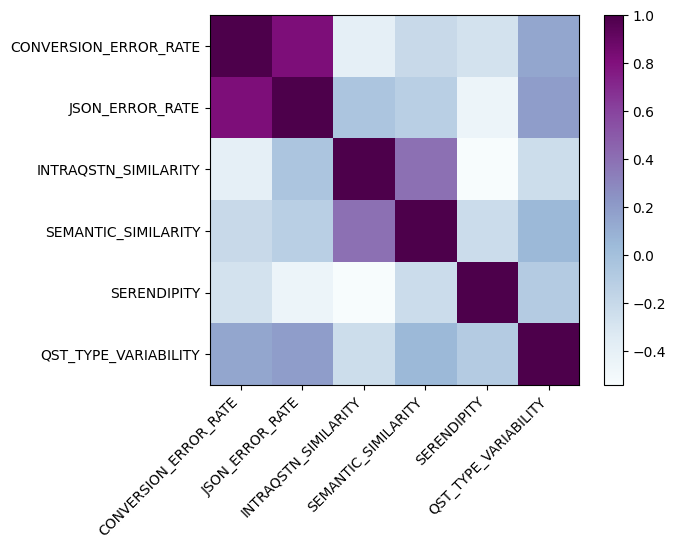

In [12]:
gpt_rv.plot_general_correlation_matrix()

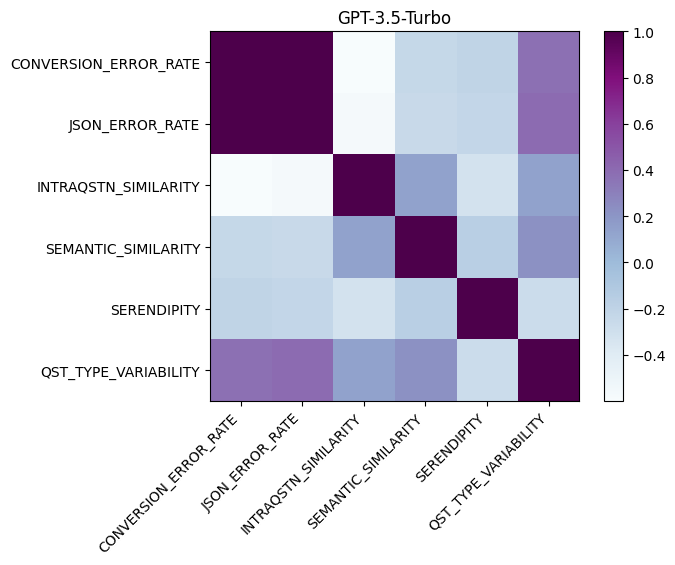

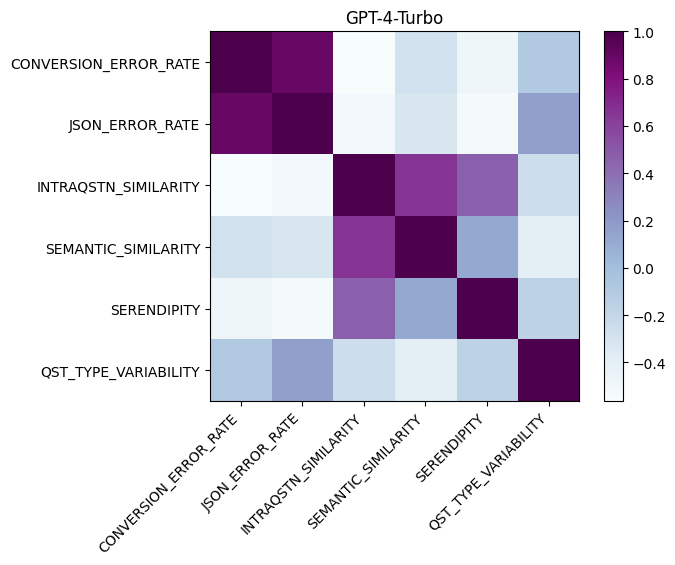

In [13]:
gpt_rv.plot_correlation_matrix_by_config(title="GPT-3.5-Turbo", model="gpt-35-turbo")
gpt_rv.plot_correlation_matrix_by_config(title="GPT-4-Turbo", model="gpt-4")

### **Conversion and JSON error**

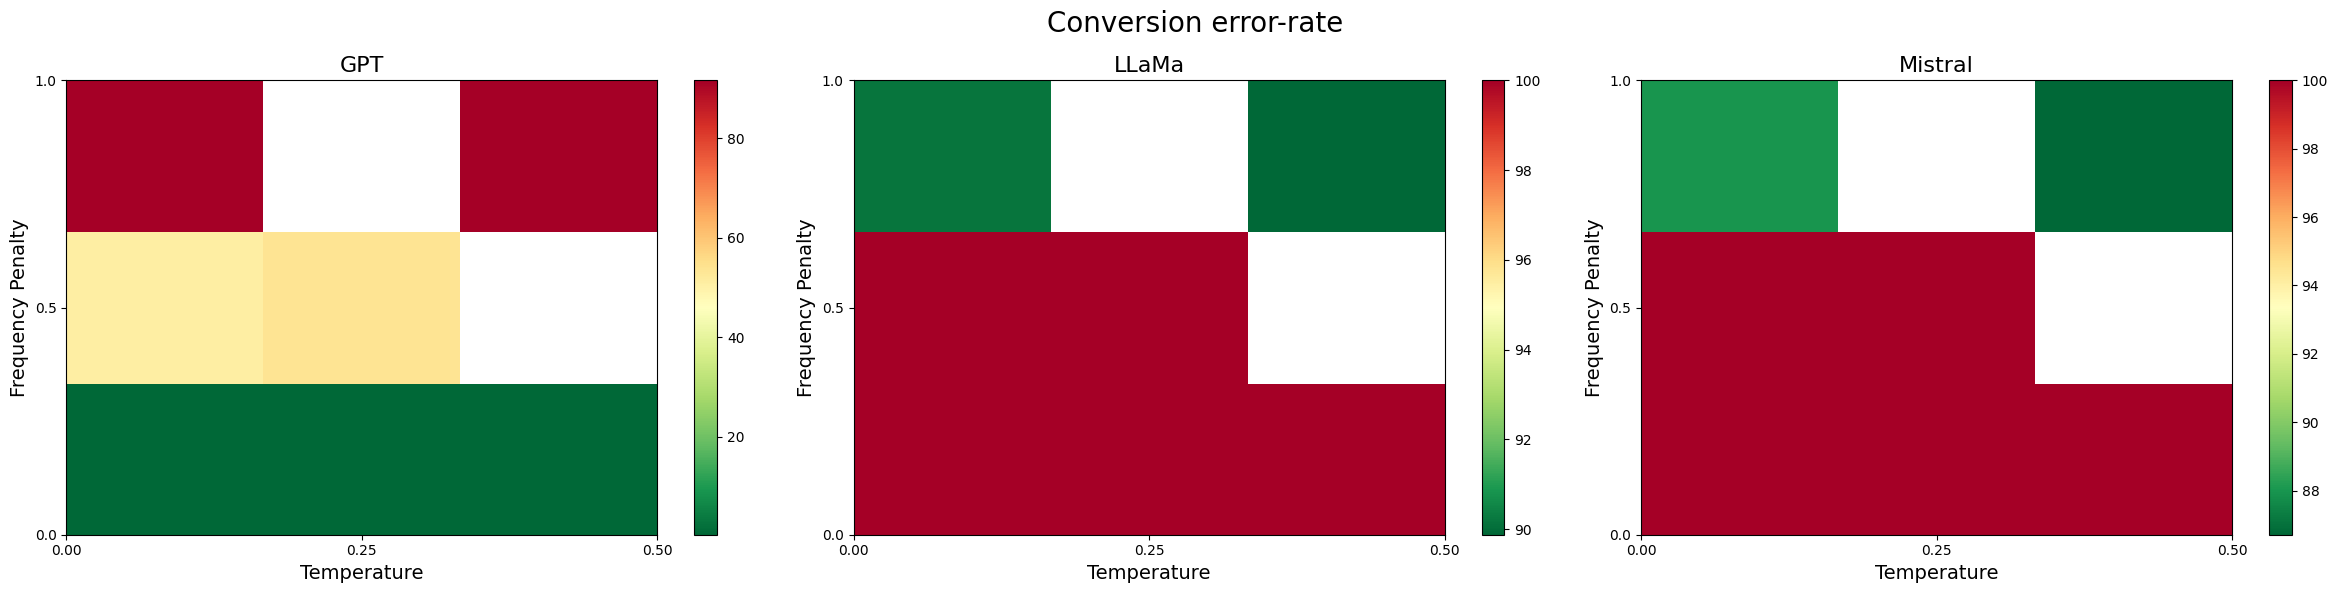

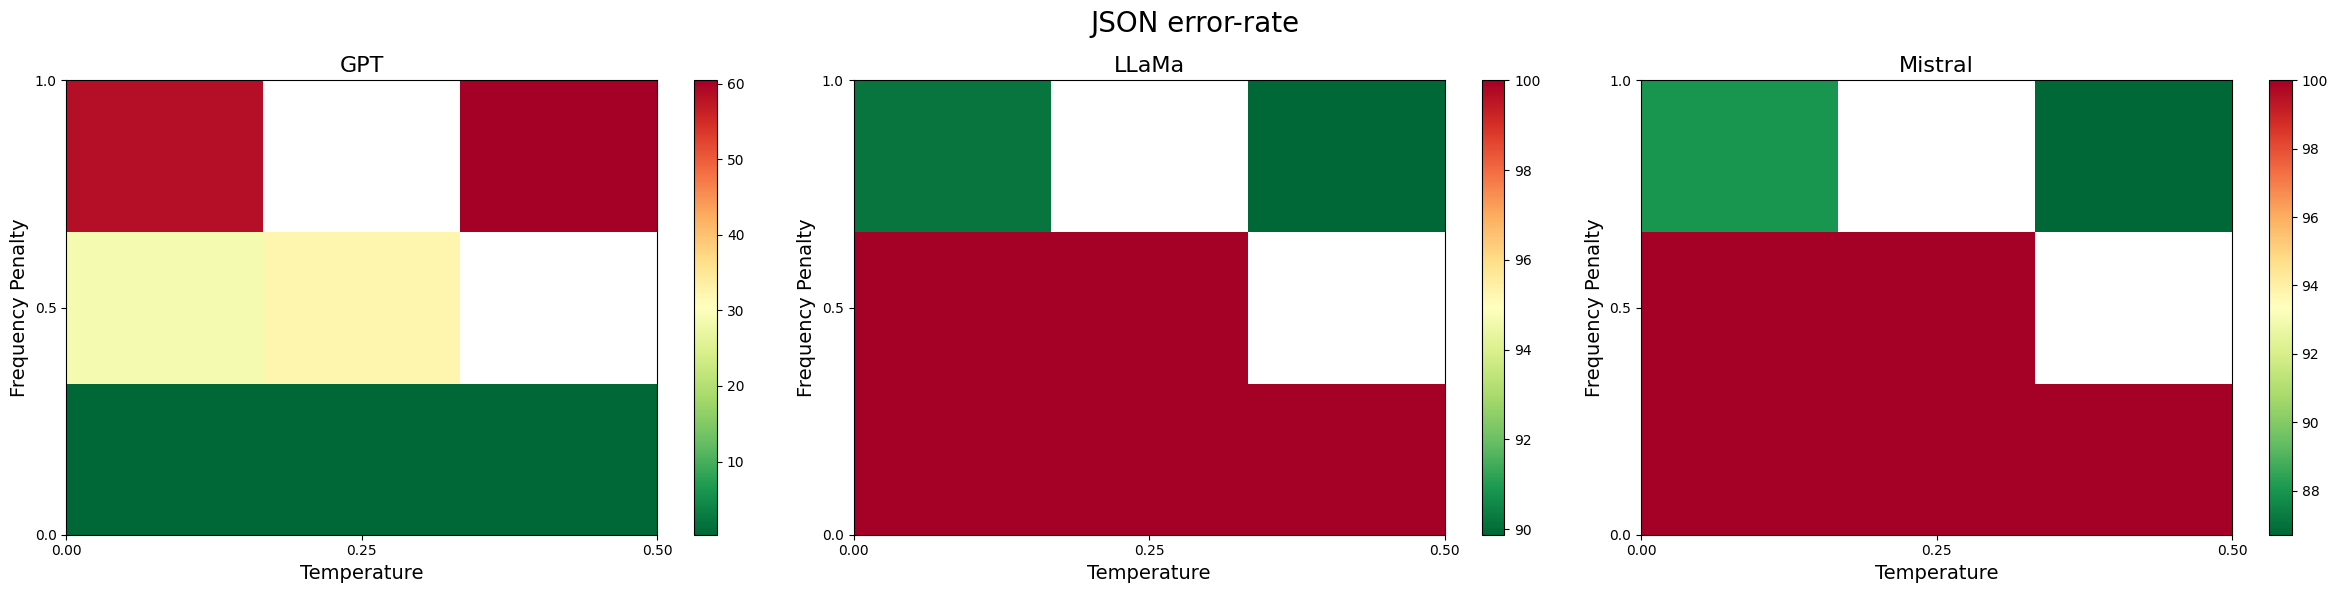

In [14]:
global_rv.plot_errors_heatmap()

#### **GPT**

In [15]:
gpt_bw_conv[["EXPERIMENT_ID", "CONVERSION_ERROR_RATE"]]

,EXPERIMENT_ID,CONVERSION_ERROR_RATE
0,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_1FP,100.0
1,0s_gpt-35-turbo-dev_6000MT_0T_1FP,100.0
2,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
3,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
4,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
5,0s_FULL_gpt-4-dev_4000MT_0.25T_0FP_JSON,0.0
6,0s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,0.0
7,0s_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
8,0s_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
9,0s_gpt-35-turbo-dev_6000MT_0T_0FP,0.0


In [16]:
gpt_bw_json[["EXPERIMENT_ID", "JSON_ERROR_RATE"]]

,EXPERIMENT_ID,JSON_ERROR_RATE
0,0s_gpt-35-turbo-dev_6000MT_0T_1FP,100.0
1,0s_FULL_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
2,0s_FULL_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
3,0s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
4,0s_FULL_gpt-4-dev_4000MT_0.25T_0FP_JSON,0.0
5,0s_FULL_gpt-4-dev_4000MT_0T_0FP_JSON,0.0
6,0s_gpt-35-turbo-dev_6000MT_0.25T_0FP,0.0
7,0s_gpt-35-turbo-dev_6000MT_0.5T_0FP,0.0
8,0s_gpt-35-turbo-dev_6000MT_0T_0FP,0.0
9,0s_gpt-4-dev_4000MT_0T_0FP_JSON,0.0


#### **LLaMa**

In [17]:
llama_bw_conv[["EXPERIMENT_ID", "CONVERSION_ERROR_RATE"]]

,EXPERIMENT_ID,CONVERSION_ERROR_RATE
0,0s_FULL_llama3-8b_4000MT_0.25T_0.1FP,100.000000
1,0s_FULL_llama3-8b_4000MT_0.25T_0.5FP,100.000000
2,0s_FULL_llama3-8b_4000MT_0.5T_0.1FP,100.000000
3,0s_FULL_llama3-8b_4000MT_0T_0.1FP,100.000000
4,0s_FULL_llama3-8b_4000MT_0T_0.5FP,100.000000
5,0s_llama3-8b_4000MT_0.25T_0.1FP,100.000000
6,0s_llama3-8b_4000MT_0.25T_0.5FP,100.000000
7,0s_llama3-8b_4000MT_0.5T_0.1FP,100.000000
8,0s_llama3-8b_4000MT_0T_0.1FP,100.000000
9,0s_llama3-8b_4000MT_0T_0.5FP,100.000000


In [18]:
llama_bw_json[["EXPERIMENT_ID", "JSON_ERROR_RATE"]]

,EXPERIMENT_ID,JSON_ERROR_RATE
0,0s_FULL_llama3-8b_4000MT_0.25T_0.1FP,100.000000
1,0s_FULL_llama3-8b_4000MT_0.25T_0.5FP,100.000000
2,0s_FULL_llama3-8b_4000MT_0.5T_0.1FP,100.000000
3,0s_FULL_llama3-8b_4000MT_0T_0.1FP,100.000000
4,0s_FULL_llama3-8b_4000MT_0T_0.5FP,100.000000
5,0s_llama3-8b_4000MT_0.25T_0.1FP,100.000000
6,0s_llama3-8b_4000MT_0.25T_0.5FP,100.000000
7,0s_llama3-8b_4000MT_0.5T_0.1FP,100.000000
8,0s_llama3-8b_4000MT_0T_0.1FP,100.000000
9,0s_llama3-8b_4000MT_0T_0.5FP,100.000000


#### **Mistral**

In [19]:
mistral_bw_conv[["EXPERIMENT_ID", "CONVERSION_ERROR_RATE"]]

,EXPERIMENT_ID,CONVERSION_ERROR_RATE
0,0s_FULL_mistral-7x22B_4000MT_0.25T_0.1FP,100.000000
1,0s_FULL_mistral-7x22B_4000MT_0.25T_0.5FP,100.000000
2,0s_FULL_mistral-7x22B_4000MT_0.5T_0.1FP,100.000000
3,0s_FULL_mistral-7x22B_4000MT_0T_0.1FP,100.000000
4,0s_FULL_mistral-7x22B_4000MT_0T_0.5FP,100.000000
5,0s_mistral-7x22B_4000MT_0.25T_0.1FP,100.000000
6,0s_mistral-7x22B_4000MT_0.25T_0.5FP,100.000000
7,0s_mistral-7x22B_4000MT_0.5T_0.1FP,100.000000
8,0s_mistral-7x22B_4000MT_0T_0.1FP,100.000000
9,0s_mistral-7x22B_4000MT_0T_0.5FP,100.000000


In [20]:
mistral_bw_json[["EXPERIMENT_ID", "JSON_ERROR_RATE"]]

,EXPERIMENT_ID,JSON_ERROR_RATE
0,0s_FULL_mistral-7x22B_4000MT_0.25T_0.1FP,100.000000
1,0s_FULL_mistral-7x22B_4000MT_0.25T_0.5FP,100.000000
2,0s_FULL_mistral-7x22B_4000MT_0.5T_0.1FP,100.000000
3,0s_FULL_mistral-7x22B_4000MT_0T_0.1FP,100.000000
4,0s_FULL_mistral-7x22B_4000MT_0T_0.5FP,100.000000
5,0s_mistral-7x22B_4000MT_0.25T_0.1FP,100.000000
6,0s_mistral-7x22B_4000MT_0.25T_0.5FP,100.000000
7,0s_mistral-7x22B_4000MT_0.5T_0.1FP,100.000000
8,0s_mistral-7x22B_4000MT_0T_0.1FP,100.000000
9,0s_mistral-7x22B_4000MT_0T_0.5FP,100.000000


### **Intraquestionnaire similarity**

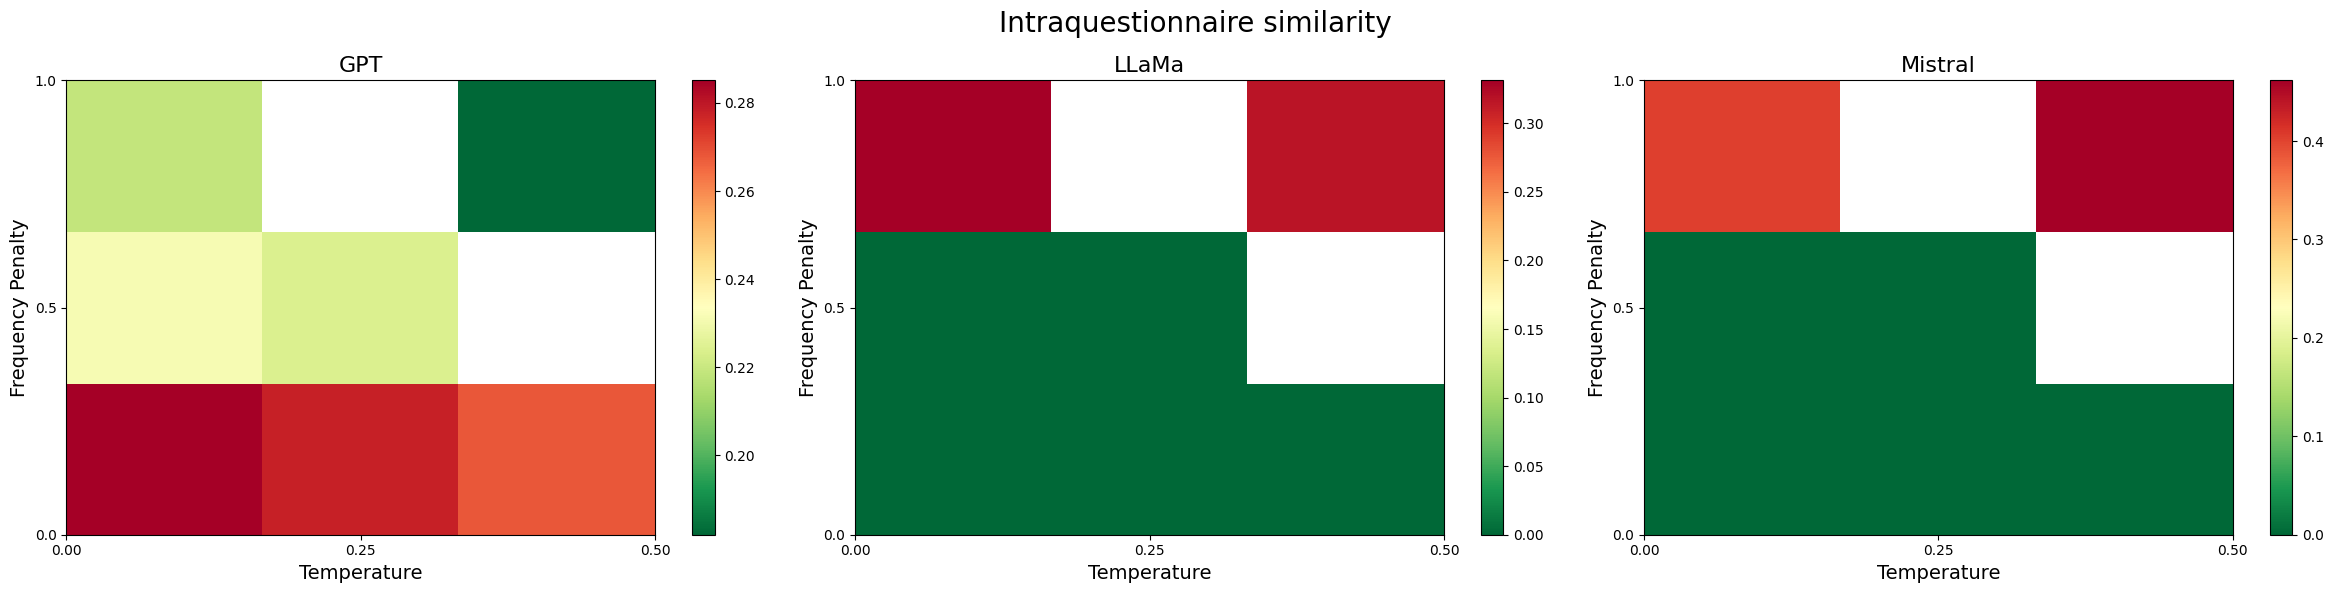

In [21]:
global_rv.plot_intraquestionnaire_similarity_heatmap()

#### **GPT**

In [22]:
gpt_bw_iqs[["EXPERIMENT_ID", "INTRAQSTN_ROUGE_L_F1_SCORE"]]

,EXPERIMENT_ID,INTRAQSTN_ROUGE_L_F1_SCORE
0,0s_FULL_gpt-35-turbo-dev_6000MT_0T_1FP,0.390810
1,0s_gpt-4-dev_4000MT_0.5T_1FP_JSON,0.142613


#### **LLaMa**

In [23]:
llama_bw_iqs[["EXPERIMENT_ID", "INTRAQSTN_ROUGE_L_F1_SCORE"]]

,EXPERIMENT_ID,INTRAQSTN_ROUGE_L_F1_SCORE
0,0s_llama3-8b_4000MT_0.5T_0.9FP,0.356952
1,1s_llama3-8b_4000MT_0.5T_0.9FP,0.273470


#### **Mistral**

In [24]:
mistral_bw_iqs[["EXPERIMENT_ID", "INTRAQSTN_ROUGE_L_F1_SCORE"]]

,EXPERIMENT_ID,INTRAQSTN_ROUGE_L_F1_SCORE
0,1s_FULL_mistral-7x22B_4000MT_0.5T_0.9FP,0.608666
1,1s_FULL_mistral-7x22B_4000MT_0T_0.9FP,0.330237


### **Question type variabiltiy**

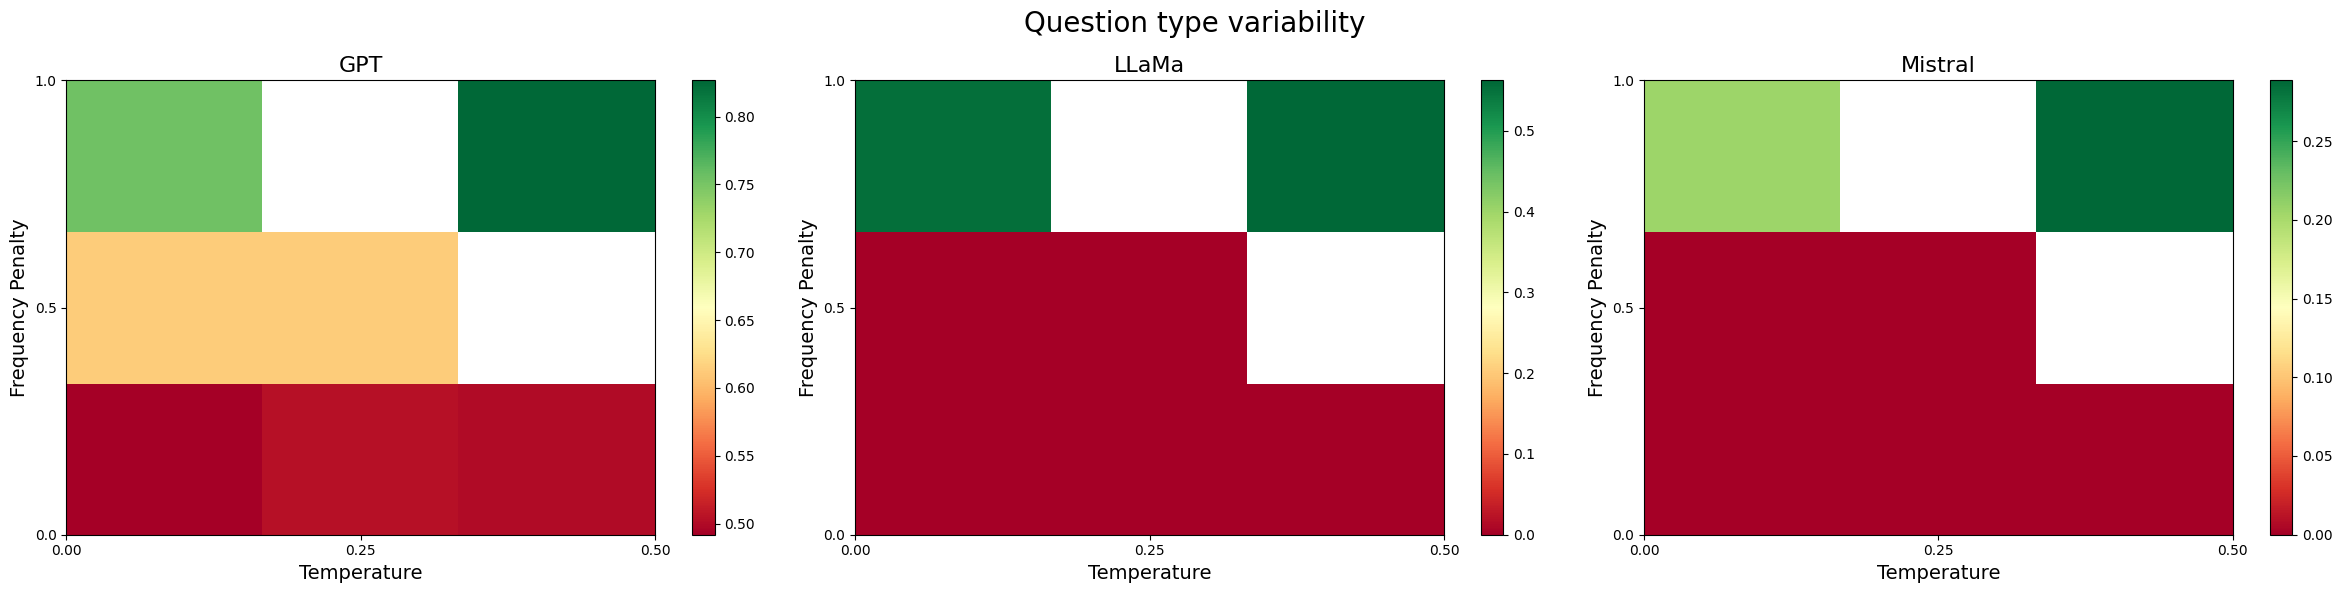

In [25]:
global_rv.plot_qst_type_variabiliy_heatmap()

#### **GPT**

In [26]:
gpt_bw_qtv[["EXPERIMENT_ID", "AVG_QST_TYPE_VARIABILITY"]]

,EXPERIMENT_ID,AVG_QST_TYPE_VARIABILITY
0,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,1.000000
1,1s_FULL_gpt-35-turbo-dev_6000MT_0T_0FP,0.424084


#### **LLaMa**

In [27]:
llama_bw_qtv[["EXPERIMENT_ID", "AVG_QST_TYPE_VARIABILITY"]]

,EXPERIMENT_ID,AVG_QST_TYPE_VARIABILITY
0,0s_FULL_llama3-8b_4000MT_0T_0.9FP,0.784158
1,1s_llama3-8b_4000MT_0T_0.9FP,0.291667


#### **Mistral**

In [28]:
mistral_bw_qtv[["EXPERIMENT_ID", "AVG_QST_TYPE_VARIABILITY"]]

,EXPERIMENT_ID,AVG_QST_TYPE_VARIABILITY
0,0s_mistral-7x22B_4000MT_0.5T_0.9FP,0.386111
1,1s_FULL_mistral-7x22B_4000MT_0T_0.9FP,0.142857


### **Semantic similarity**

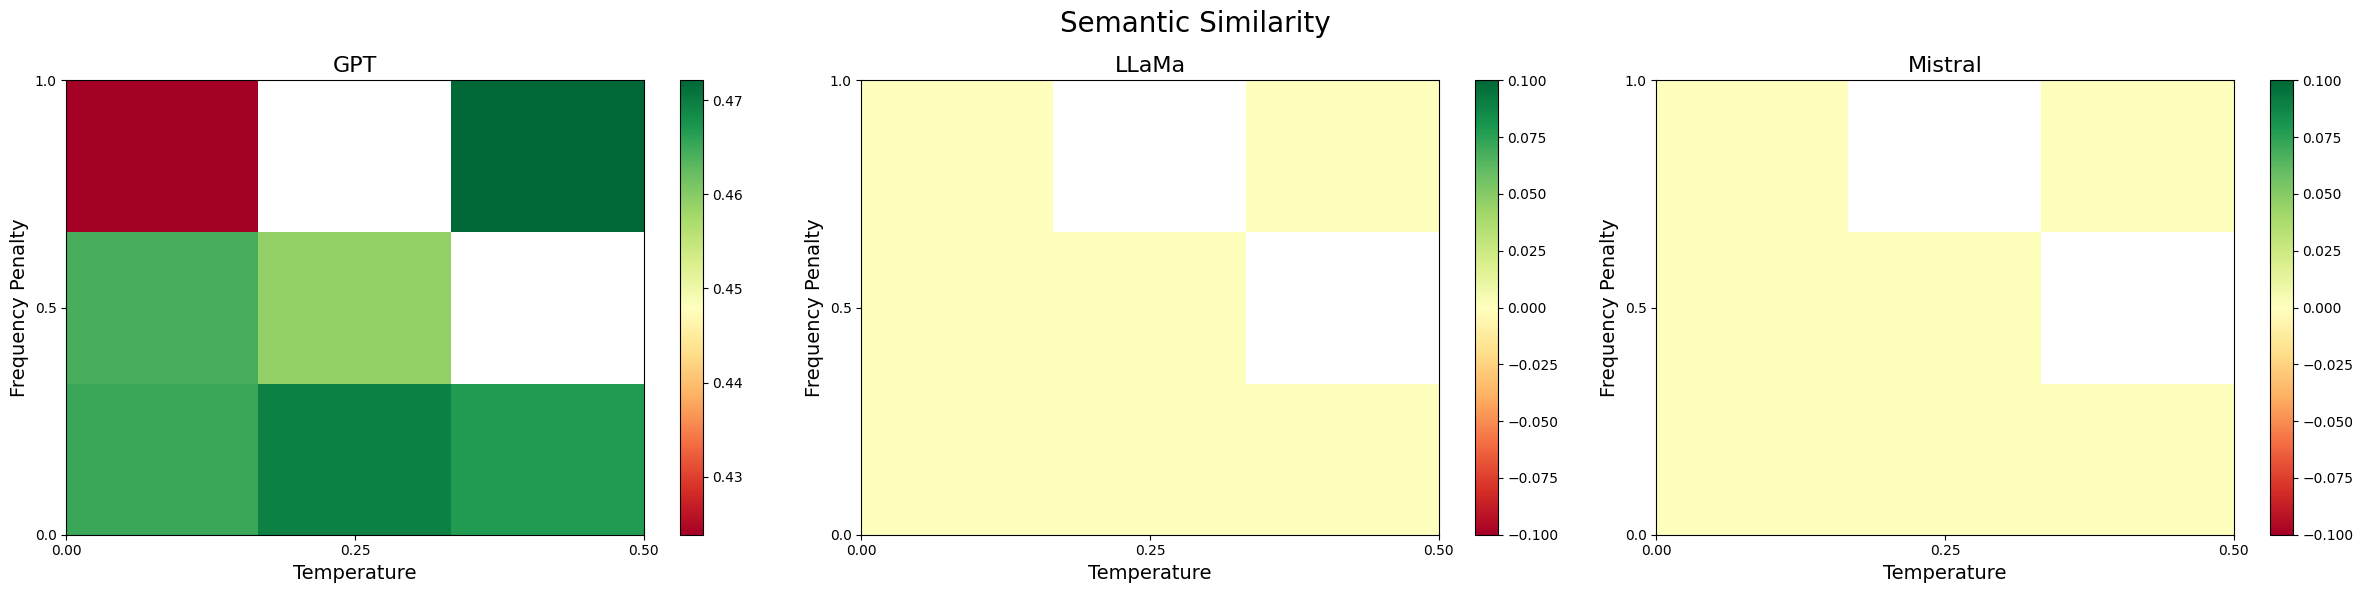

In [29]:
global_rv.plot_semantic_similarity_heatmap()

#### **GPT**

In [30]:
gpt_bw_semsim[["EXPERIMENT_ID", "FINAL_SCORE"]]

,EXPERIMENT_ID,FINAL_SCORE
0,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,0.650004
1,0s_gpt-35-turbo-dev_6000MT_0T_1FP,0.333347


#### **LLaMa**

In [31]:
llama_bw_semsim[["EXPERIMENT_ID", "FINAL_SCORE"]]

,EXPERIMENT_ID,FINAL_SCORE


#### **Mistral**

In [32]:
mistral_bw_semsim[["EXPERIMENT_ID", "FINAL_SCORE"]]

,EXPERIMENT_ID,FINAL_SCORE


### **Serendipity**

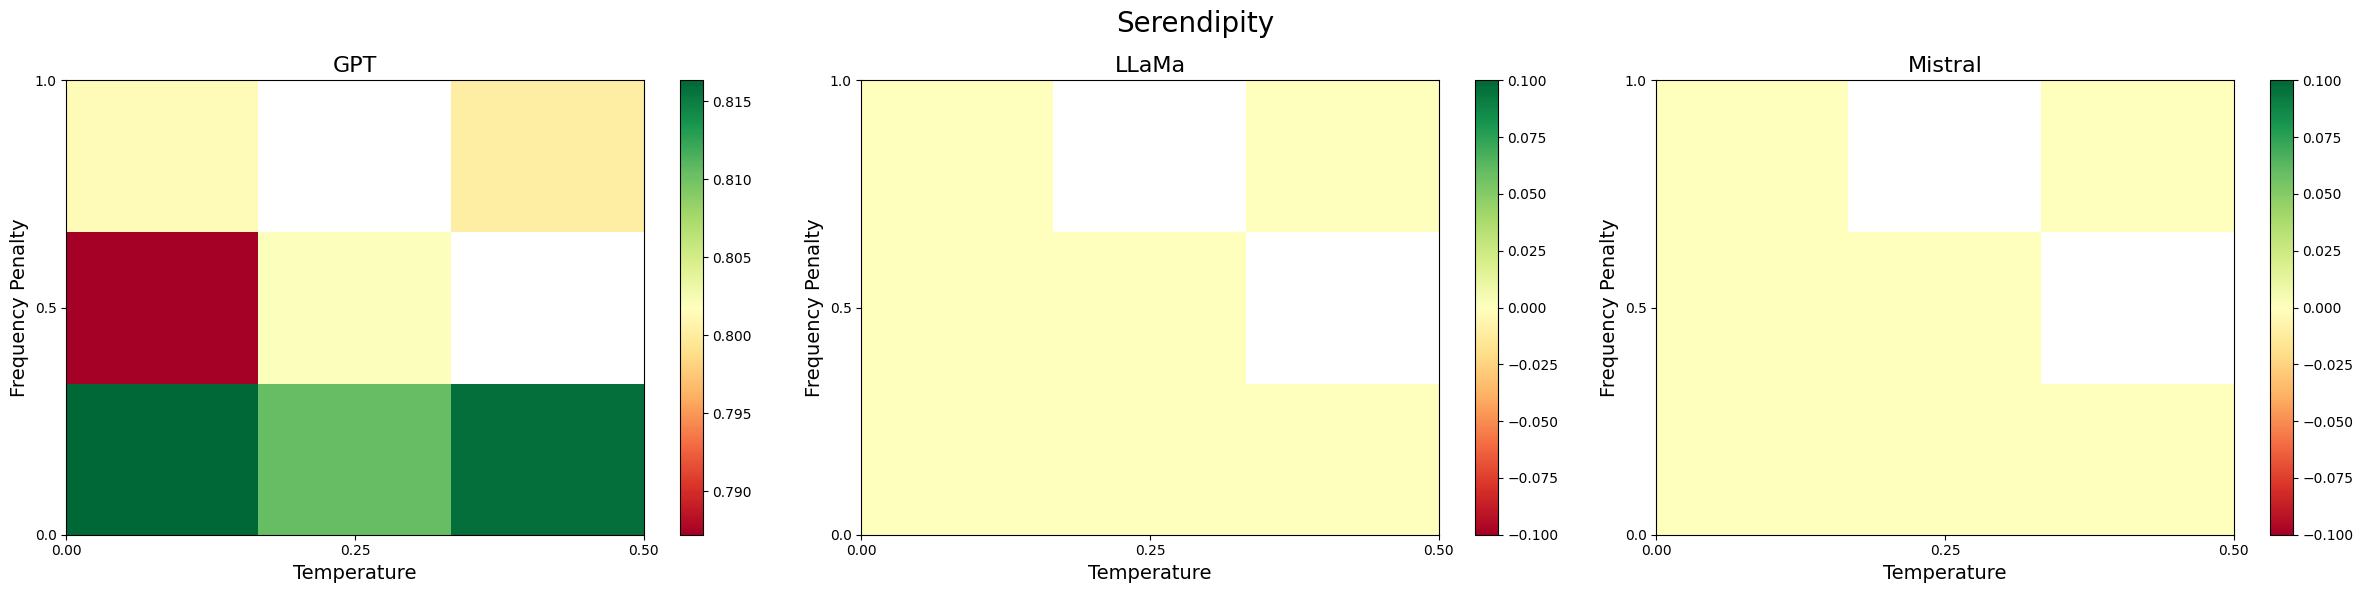

In [33]:
global_rv.plot_serendipity_heatmap()

#### **GPT**

In [34]:
gpt_bw_srdp[["EXPERIMENT_ID", "AVG_SERENDIPITY_SCORE"]]

,EXPERIMENT_ID,AVG_SERENDIPITY_SCORE
0,0s_gpt-4-dev_4000MT_0T_1FP_JSON,0.872126
1,0s_FULL_gpt-35-turbo-dev_6000MT_0T_1FP,0.666667
2,0s_gpt-35-turbo-dev_6000MT_0.5T_1FP,0.666667


#### **LLaMa**

In [35]:
llama_bw_srdp[["EXPERIMENT_ID", "AVG_SERENDIPITY_SCORE"]]

,EXPERIMENT_ID,AVG_SERENDIPITY_SCORE


#### **Mistral**

In [36]:
mistral_bw_srdp[["EXPERIMENT_ID", "AVG_SERENDIPITY_SCORE"]]

,EXPERIMENT_ID,AVG_SERENDIPITY_SCORE
